# Visualization of Dataset Splits

### Class

In the context of machine learning and the splitting algorithms available in scikit-learn's model selection module, a __class__ refers to a category or label that can be assigned to a __sample__ (e.g., a data point) based on its characteristics.

For example, in a __classification problem__, each sample might belong to one of several classes, such as "cat," "dog," or "other." The goal of the machine learning algorithm is to learn a model that can predict the class label for new, unseen samples based on their features or attributes.

In the context of splitting algorithms, the __class balance__ refers to the proportion of each class in the dataset. Some splitting algorithms, such as StratifiedSplit, aim to maintain the class balance in the training and test sets, ensuring that each class is represented similarly in both sets. This helps to avoid __overfitting__ to any one class and improves the model's performance on unseen data.

In summary, a class in this context is a predefined category or label that can be assigned to a sample based on its characteristics, and the class balance refers to the proportion of each class in the dataset


### Cross-Validation

__Cross-validation__ refers to a technique used to evaluate the performance of 
a model on unseen data. The basic idea behind cross-validation is to split the available data into two sets: a __training set__ and a __test set__. The training set is used to train the model, and the test set is used to evaluate  the model's performance.

The key advantage of cross-validation is that it helps to avoid __overfitting__, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By using a separate test set, cross-validation ensures that the model is tested on data it has not seen before and provides a more accurate estimate of its performance on unseen data.

Now, let's talk about __"k-fold"__ cross-validation. In k-fold cross-validation, the available data is split into k subsets or "folds," and each fold is used once as a test set while the remaining k-1 folds are used as training sets. This process is repeated k times, with each fold serving as a test set once.

The word "k-fold" comes from the fact that the data is split into k subsets or "folds," and each fold is used  once as a test set. The value of k can be any positive integer, but common values range from 2 to 10.

The advantage of k-fold cross-validation over other forms of cross-validation is that it provides a more robust estimate of the model's performance on unseen data. By using multiple folds and averaging the performance  across them, k-fold cross-validation reduces the variability in the evaluation and provides a more reliable estimate of the model's generalization ability.

In summary, cross-validation is a technique used to evaluate the performance of a machine learning model on unseen data, while k-fold cross-validation splits the available data into k subsets or "folds," with each fold used once as a test set, providing a more robust estimate of the model's generalization ability.

## Generating Data and Visualizing by Class and Group

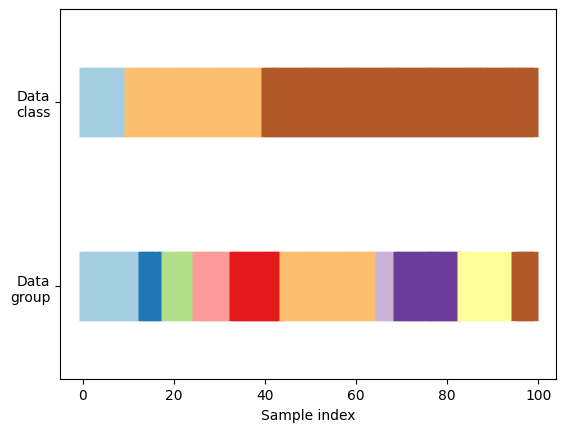

In [1]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

import numpy as np

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

## Visualize KFold Split

KFold:

K-fold cross-validation, where the dataset is split into k subsets, and each subset is used once as a test set while the remaining k-1 subsets are used as training sets. This is useful for evaluating the performance of a model on unseen data.

<Axes: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

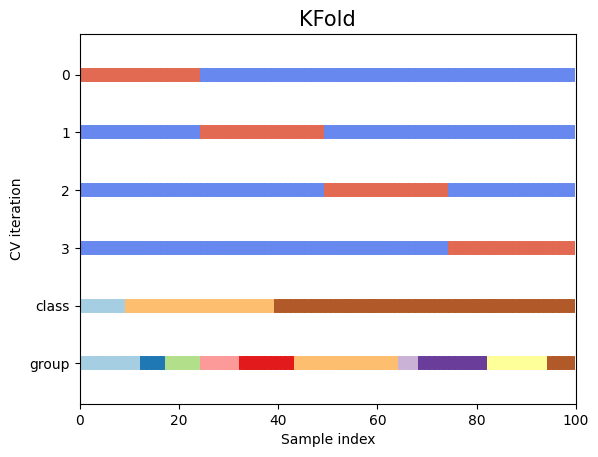

In [2]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

## Other KFold Variants

Stratified Splits (Classification Splits):

Splits the dataset into training and test sets while maintaining the class balance, 
i.e., the same proportion of each class in both the training and test sets.

Group Splits (Feature Splits)

Grouped cross-validation, where the dataset is split into groups based on a specified
column (e.g., age group or gender), and each group is used as a test set while the remaining groups are used as training sets. This is useful for evaluating the performance of a model on specific subgroups within the dataset.

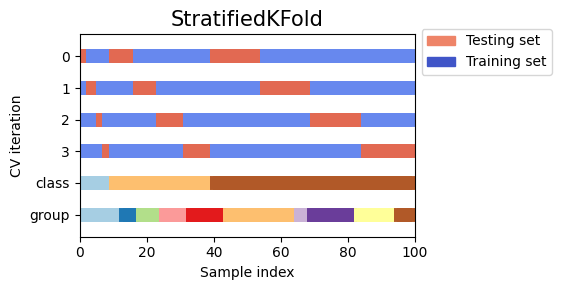

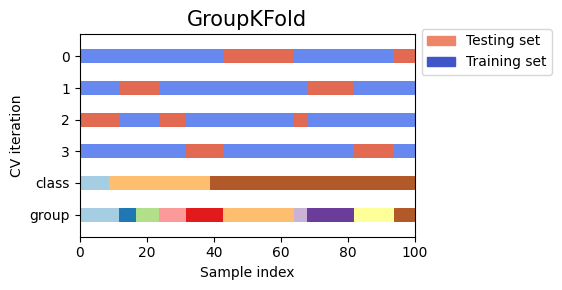

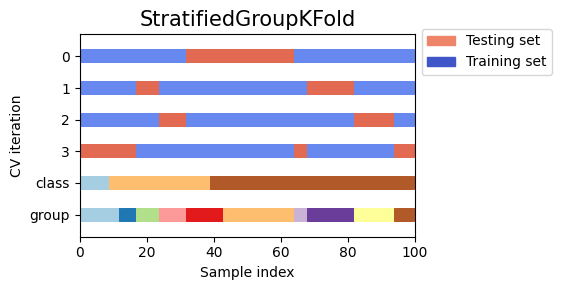

In [3]:
cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)


## Visualizing Them All Together

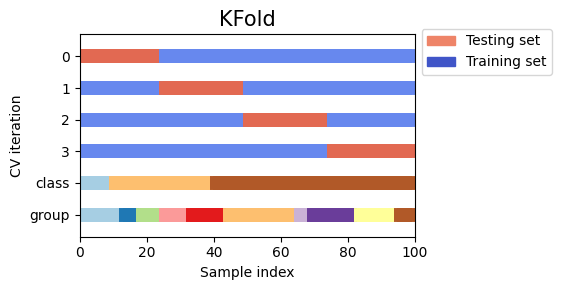

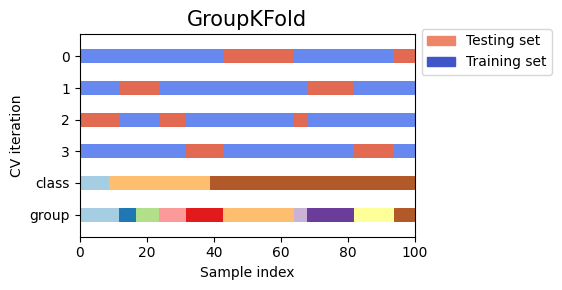

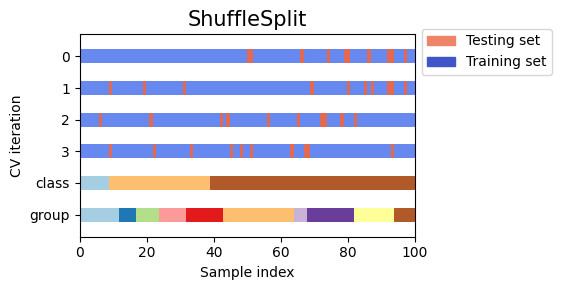

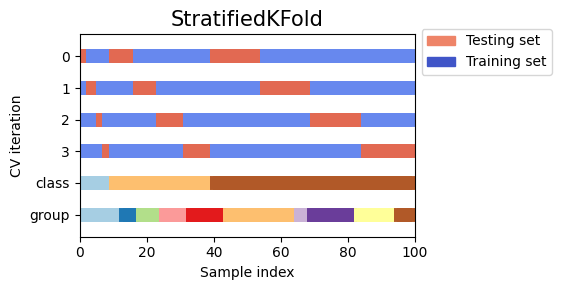

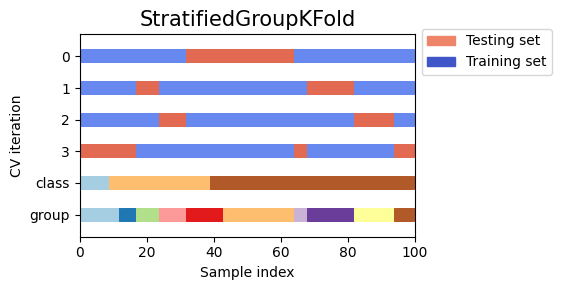

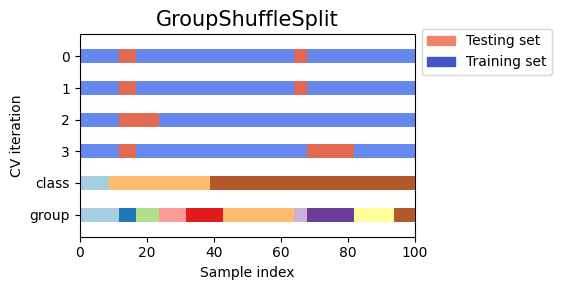

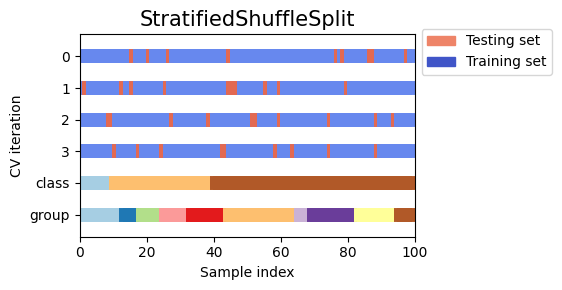

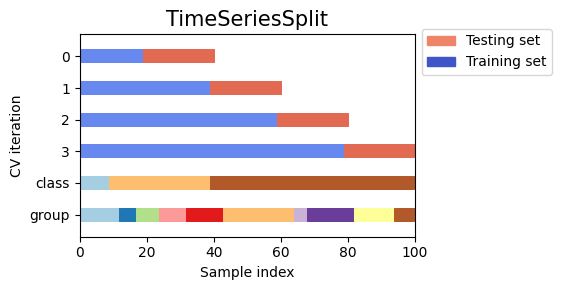

In [4]:
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedGroupKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()